In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Primary- Regeneron Pharmaceuticals, Inc. (REGN)**

In [ ]:
def fetch_data(ticker,period="5y"):
  ticker_data = yf.Ticker(ticker)
  df = ticker_data.history(period=period)
  return df
def plot_charts(df,ticker):
  #Daily
  plt.figure(figsize=(12,6))
  plt.plot(df['Close'])
  plt.title(f'{ticker} Daily Closing Price')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

  #WEEKLY
  df_weekly = df['Close'].resample('W').mean()
  plt.figure(figsize=(12, 6))
  plt.plot(df_weekly)
  plt.title(f'{ticker} Weekly Closing Price')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

  # Monthly
  df_monthly = df['Close'].resample('M').mean()
  plt.figure(figsize=(12, 6))
  plt.plot(df_monthly)
  plt.title(f'{ticker} Monthly Closing Price')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

def stock_info(ticker):
  ticker_data = yf.Ticker(ticker)
  info = ticker_data.info
  return info

def high_low(df):
  high = df['Close'].max()
  low = df['Close'].min()
  high_52=info['fiftyTwoWeekHigh']
  low_52=info['fiftyTwoWeekLow']
  return high,low,high_52,low_52

def risk_measures(df):
  daily_returns = df['Close'].pct_change()
  std_dev = daily_returns.std()
  beta=info['beta']
  return std_dev,beta

def calculate_return_measures(df):
  daily_returns = df['Close'].pct_change()
  monthly_returns = df['Close'].resample('M').ffill().pct_change()
  annual_returns = df['Close'].resample('Y').ffill().pct_change()

  plt.figure(figsize=(10, 6))
  plt.plot(daily_returns, label='Daily Returns', color='blue')
  plt.title('Daily Returns')
  plt.ylabel('Return')
  plt.xlabel('Date')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.plot(monthly_returns, label='Monthly Returns', color='green')
  plt.title('Monthly Returns')
  plt.ylabel('Return')
  plt.xlabel('Date')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.plot(annual_returns, label='Annual Returns', color='red')
  plt.title('Annual Returns')
  plt.ylabel('Return')
  plt.xlabel('Date')
  plt.legend()
  plt.show()

  return daily_returns,monthly_returns,annual_returns

def calculate_technical_indicators(df):
  # Moving Averages
  df['MA20'] = df['Close'].rolling(window=20).mean()
  df['MA50'] = df['Close'].rolling(window=50).mean()

  # RSI
  delta = df['Close'].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  rs = avg_gain / avg_loss
  df['RSI'] = 100 - (100 / (1 + rs))

  # MACD
  exp12 = df['Close'].ewm(span=12, adjust=False).mean()
  exp26 = df['Close'].ewm(span=26, adjust=False).mean()
  macd = exp12 - exp26
  signal = macd.ewm(span=9, adjust=False).mean()
  df['MACD'] = macd
  df['Signal'] = signal
  plt.figure(figsize=(12, 6))
  plt.plot(df['MA20'])
  plt.title('Moving Average of 20 days')
  plt.xlabel('Date')
  plt.ylabel('MA20')
  plt.grid(True)
  plt.show()
  print()
  print()


  plt.figure(figsize=(12, 6))
  plt.plot(df['MA50'])
  plt.title('Moving Average of 50 days')
  plt.xlabel('Date')
  plt.ylabel('MA50')
  plt.grid(True)
  plt.show()
  print()
  print()


  plt.figure(figsize=(12, 6))
  plt.plot(df['RSI'])
  plt.title('Relative Strength Index')
  plt.xlabel('Date')
  plt.ylabel('RSI')
  plt.grid(True)
  plt.show()
  print()
  print()

  plt.figure(figsize=(12, 6))
  plt.plot(df['MACD'])
  plt.xlabel('Date')
  plt.ylabel('MACD')
  plt.title("Moving Average Convergence Divergence")
  plt.grid(True)
  plt.show()
  print()
  print()



  return df

def analyze_risk_over_time(df):
  df['Rolling_Std_Dev'] = df['Close'].pct_change().rolling(window=30).std()

  benchmark_ticker = yf.Ticker("^GSPC")
  benchmark_df = benchmark_ticker.history(period="5y")
  benchmark_returns = benchmark_df['Close'].pct_change()
  df['Rolling_Beta'] = df['Close'].pct_change().rolling(window=30).cov(benchmark_returns) / benchmark_returns.rolling(window=30).var()

  plt.figure(figsize=(12, 6))
  plt.plot(df['Rolling_Std_Dev'])
  plt.title('Rolling 30-Day Standard Deviation')
  plt.xlabel('Date')
  plt.ylabel('Standard Deviation')
  plt.grid(True)
  plt.show()

  plt.figure(figsize=(12, 6))
  plt.plot(df['Rolling_Beta'])
  plt.title('Rolling 30-Day Beta')
  plt.xlabel('Date')
  plt.ylabel('Beta')
  plt.grid(True)
  plt.show()
  print()
  print()







In [ ]:
def valuation_ratios(df):
  pe=info['trailingPE']
  pb=info['priceToBook']
  ev_eb=info['enterpriseToEbitda']
  return pe,pb,ev_eb
def profitability_ratios(df):
  roe=info['returnOnEquity']
  roa=info['returnOnAssets']
  pm=info['profitMargins']
  return roe,roa,pm
def growth_parameters(df,ticker_symbol):
  rg=info['revenueGrowth']
  balance_sheet=yf.Ticker(ticker_symbol).balance_sheet
  income_statement=yf.Ticker(ticker_symbol).financials
  net_income = income_statement.loc["Net Income"]
  shares_outstanding = balance_sheet.loc["Ordinary Shares Number"]
  eps_current = net_income.iloc[0] / shares_outstanding.iloc[0]
  eps_previous = net_income.iloc[1] / shares_outstanding.iloc[1]
  eps_growth = (eps_current - eps_previous) / eps_previous
  return rg,eps_growth
def cash_flow_parameters(df,ticker_symbol):
  balance_sheet=yf.Ticker(ticker_symbol).balance_sheet
  income_statement=yf.Ticker(ticker_symbol).financials
  inventory = balance_sheet.loc['Inventory'].iloc[0]
  accounts_receivable = balance_sheet.loc['Accounts Receivable'].iloc[0]
  accounts_payable = balance_sheet.loc['Accounts Payable'].iloc[0]
  cost_of_goods_sold = income_statement.loc['Cost Of Revenue'].iloc[0]
  revenue = income_statement.loc['Total Revenue'].iloc[0]
  DIO =(inventory/cost_of_goods_sold)*365
  DSO=(accounts_receivable/revenue)*365
  DPO=(accounts_payable/cost_of_goods_sold)*365
  CCC=DIO+DSO-DPO
  fcf=info['freeCashflow']
  return fcf,CCC
def working_capital_parameters(df):
  cr=info['currentRatio']
  qr=info['quickRatio']
  return cr,qr



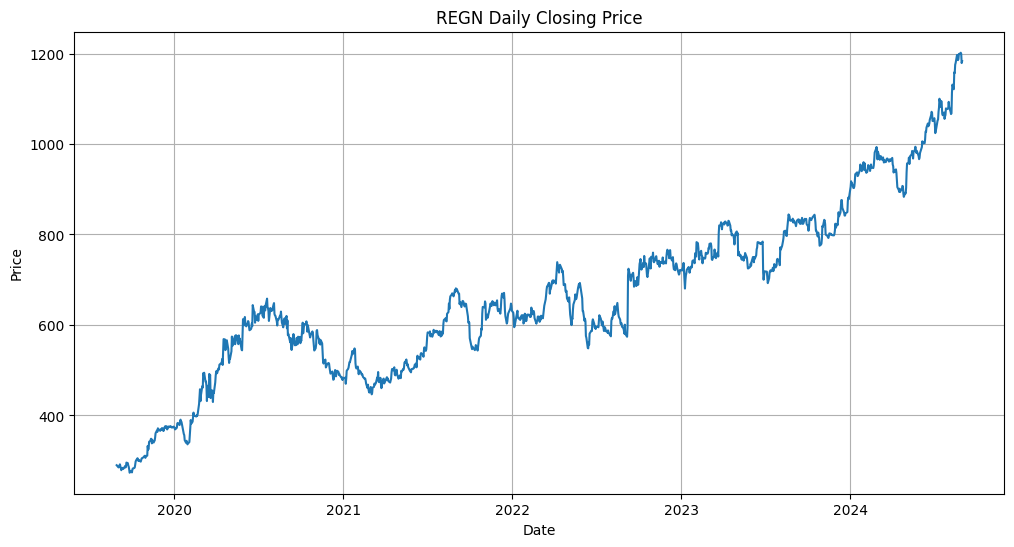

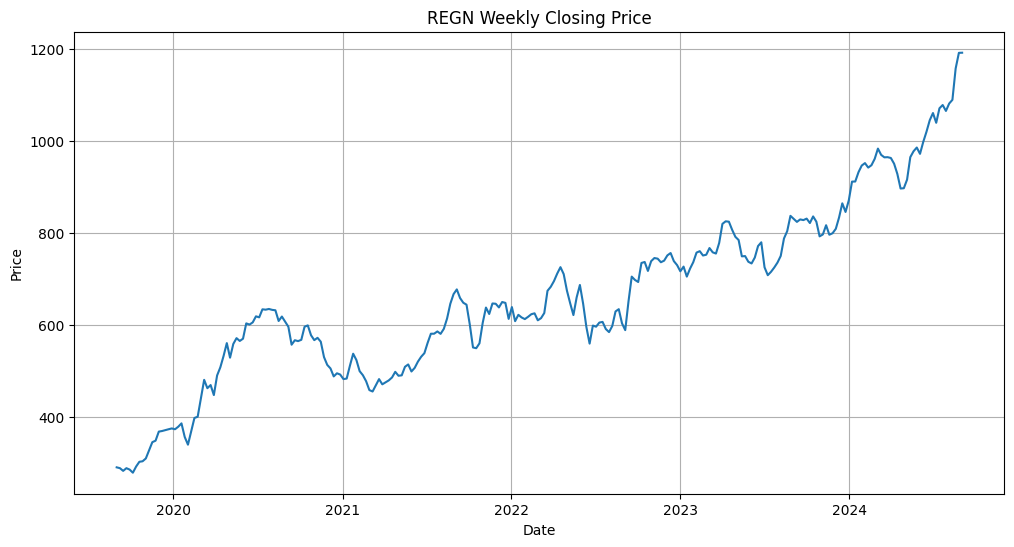

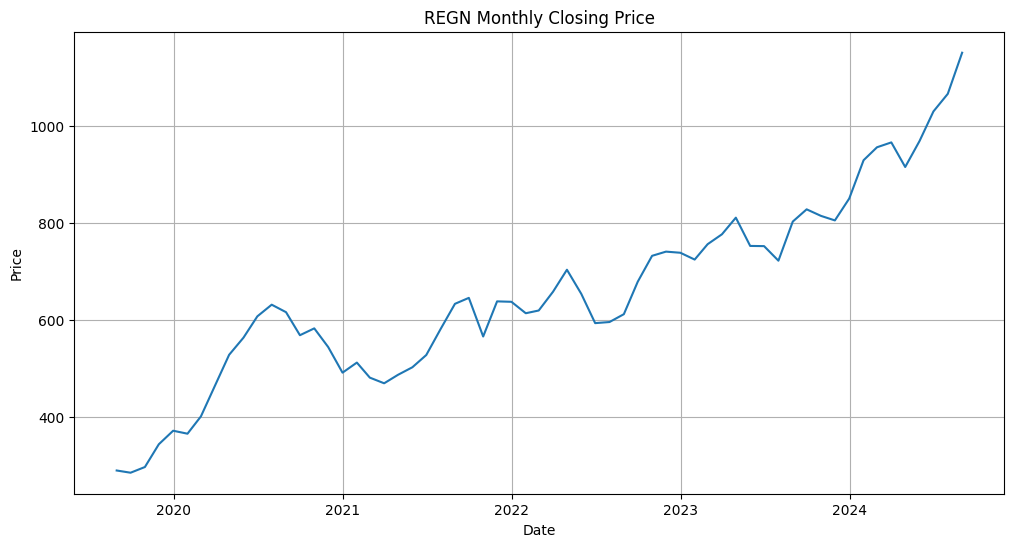

Lifetime High: 1201.760009765625
Lifetime Low: 273.4599914550781
52-Week High: 1211.2
52-Week Low: 769.19
Standard Deviation: 0.01925253399022688
Beta: 0.128


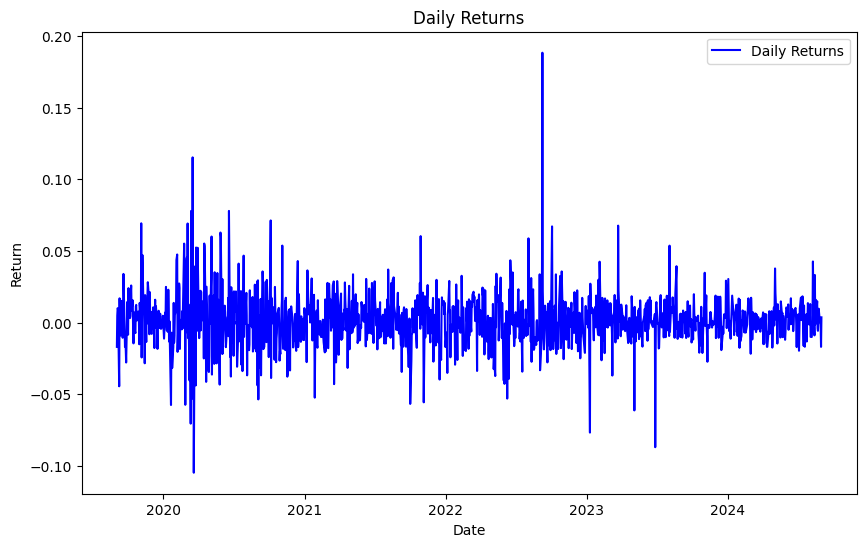

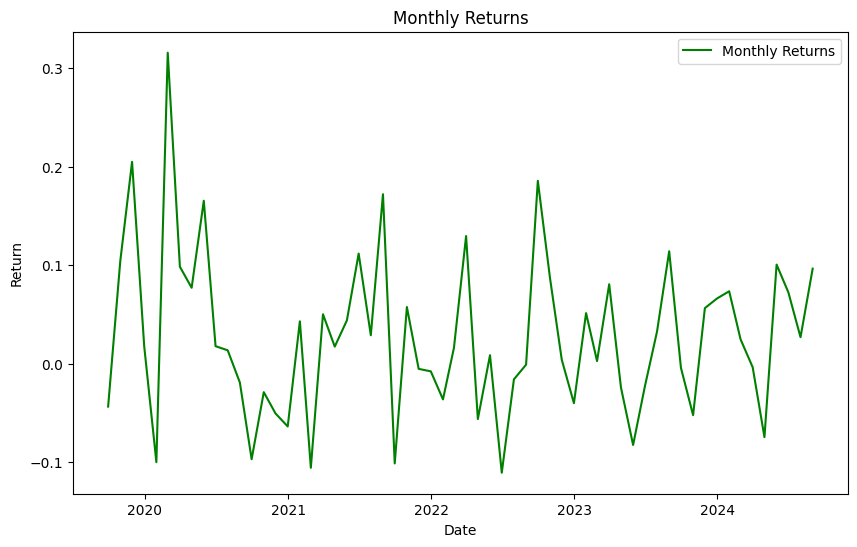

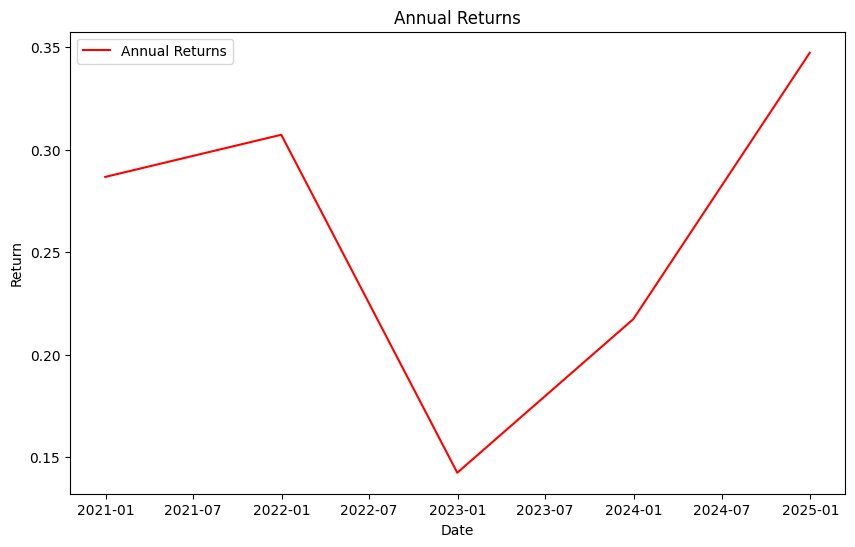

Daily Returns:

Date
2019-08-30 00:00:00-04:00         NaN
2019-09-03 00:00:00-04:00   -0.016997
2019-09-04 00:00:00-04:00    0.004840
2019-09-05 00:00:00-04:00    0.010017
2019-09-06 00:00:00-04:00    0.009089
Name: Close, dtype: float64


Monthly Returns:

Date
2019-08-31 00:00:00-04:00         NaN
2019-09-30 00:00:00-04:00   -0.043613
2019-10-31 00:00:00-04:00    0.104110
2019-11-30 00:00:00-05:00    0.204780
2019-12-31 00:00:00-05:00    0.017561
Freq: M, Name: Close, dtype: float64


Annual Returns:
Date
2019-12-31 00:00:00-05:00         NaN
2020-12-31 00:00:00-05:00    0.286646
2021-12-31 00:00:00-05:00    0.307197
2022-12-31 00:00:00-05:00    0.142466
2023-12-31 00:00:00-05:00    0.217328
Freq: A-DEC, Name: Close, dtype: float64




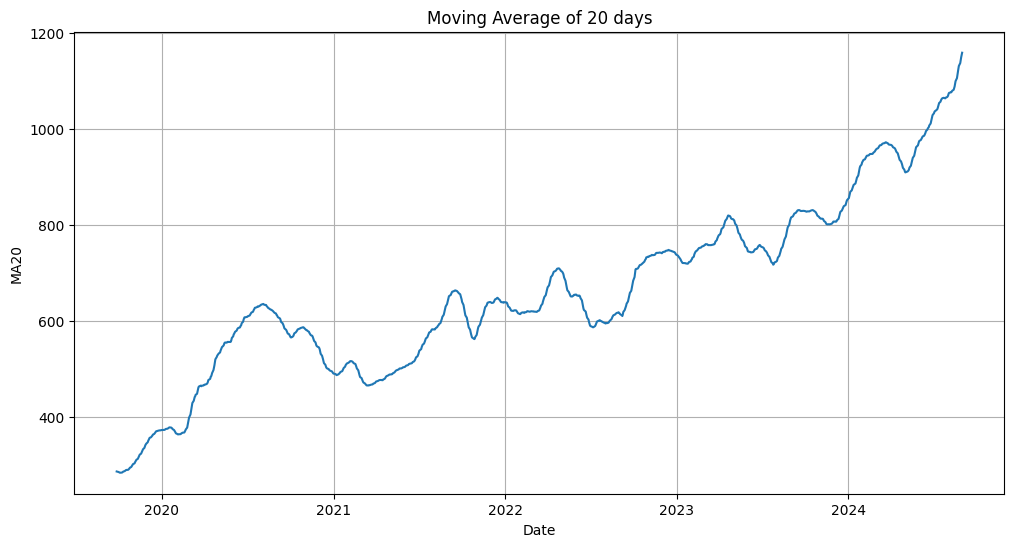

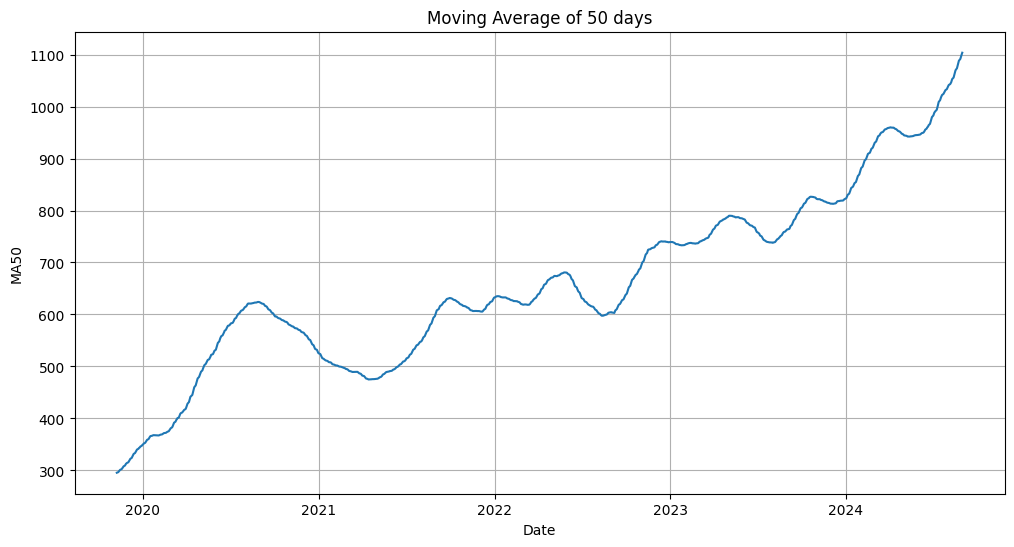

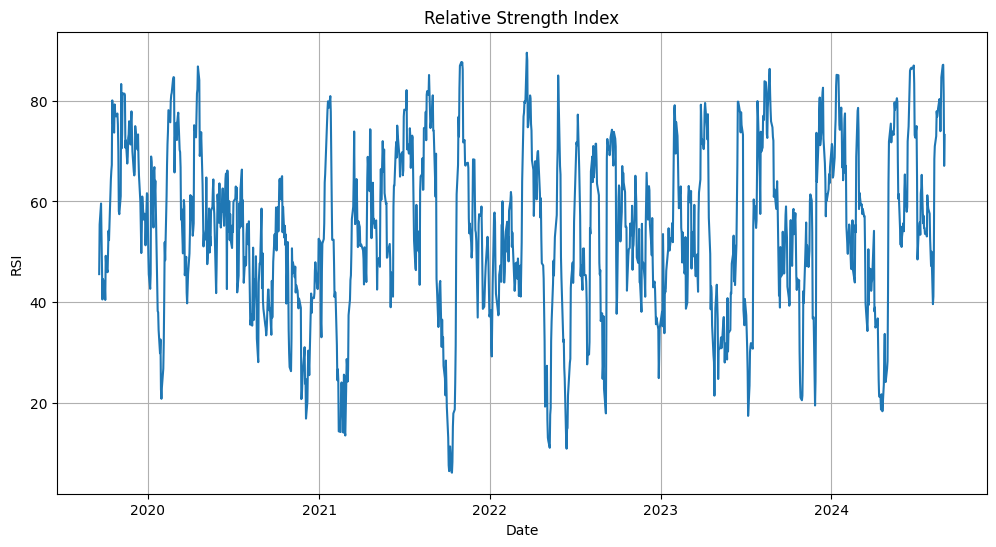

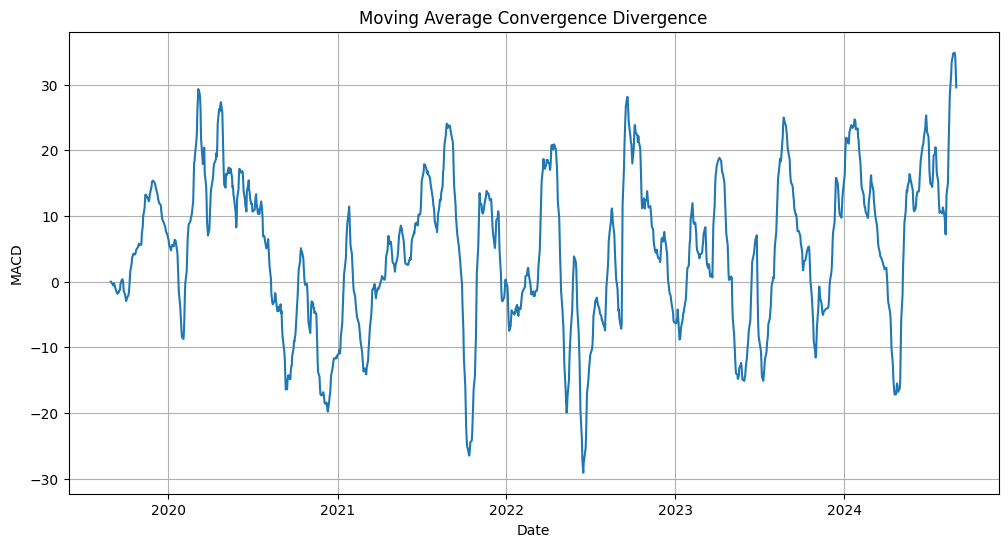



                                  MA20         MA50        RSI       MACD  \
Date                                                                        
2024-08-26 00:00:00-04:00  1136.684991  1091.516794  87.097483  34.863211   
2024-08-27 00:00:00-04:00  1142.882990  1094.821594  87.153300  34.774080   
2024-08-28 00:00:00-04:00  1148.887994  1097.899995  81.319248  34.110927   
2024-08-29 00:00:00-04:00  1153.177496  1100.696396  67.072402  31.578476   
2024-08-30 00:00:00-04:00  1158.228998  1103.472996  73.215767  29.576708   

                              Signal  
Date                                  
2024-08-26 00:00:00-04:00  30.199245  
2024-08-27 00:00:00-04:00  31.114212  
2024-08-28 00:00:00-04:00  31.713555  
2024-08-29 00:00:00-04:00  31.686539  
2024-08-30 00:00:00-04:00  31.264573  




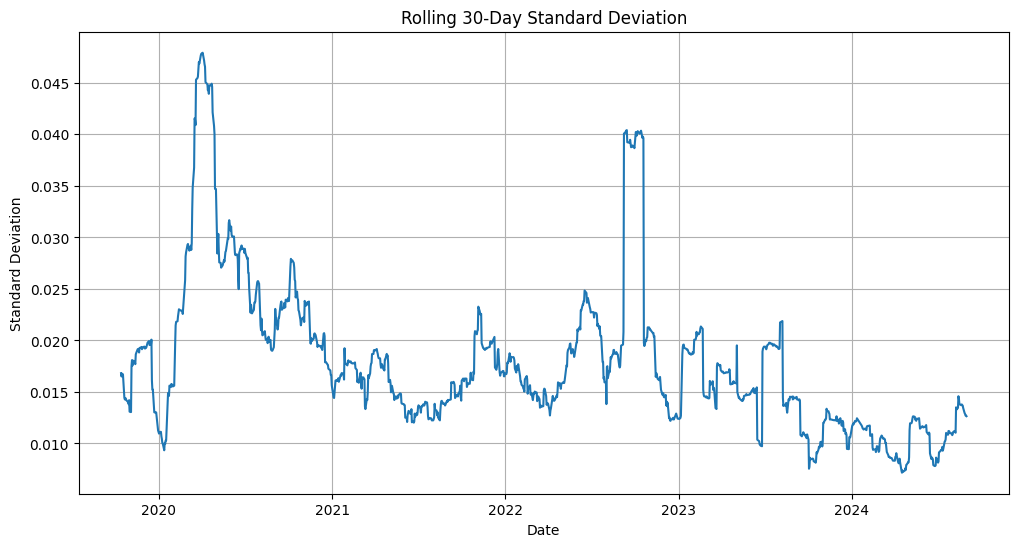

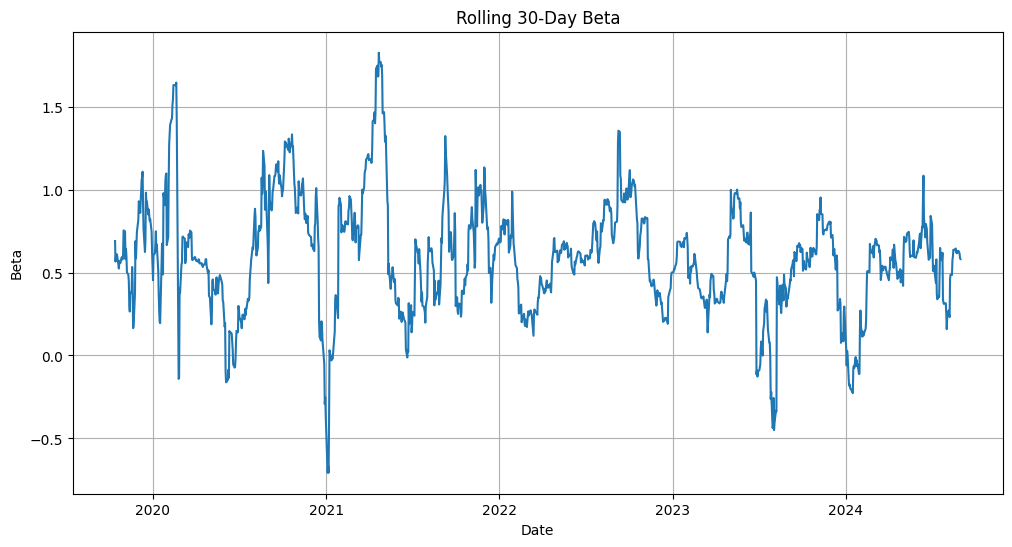

In [ ]:
ticker_symbol="REGN"
df = fetch_data(ticker_symbol,period="5y")
plot_charts(df,ticker_symbol)
info=stock_info(ticker_symbol)
high,low,high_52,low_52=high_low(df)
std_dev,beta=risk_measures(df)
print("Lifetime High:", high)
print("Lifetime Low:", low)
print("52-Week High:", high_52)
print("52-Week Low:", low_52)
print("Standard Deviation:", std_dev)
print("Beta:", beta)
daily_returns,monthly_returns,annual_returns=calculate_return_measures(df)
print("Daily Returns:")
print()
print(daily_returns.head())
print()
print()
print("Monthly Returns:")
print()
print(monthly_returns.head())
print()
print()
print("Annual Returns:")
print(annual_returns.head())
print()
print()
df = calculate_technical_indicators(df)
print(df[['MA20', 'MA50', 'RSI', 'MACD', 'Signal']].tail())
print()
print()
analyze_risk_over_time(df)

B. Ratio Analysis



In [ ]:
pe,pb,ev_eb=valuation_ratios(df)
print("PE Ratio:", pe)
print("PB Ratio:", pb)
print("EV/EBITDA Ratio:", ev_eb)
roe,roa,pm=profitability_ratios(df)
print("ROE:", roe)
print("ROA:", roa)
print("Profit Margin:", pm)
rg,eps_growth=growth_parameters(df,ticker_symbol)
print("Revenue Growth:", rg)
print("EPS Growth:", eps_growth)
fcf,CCC=cash_flow_parameters(df,ticker_symbol)
print("Free Cash Flow:", fcf)
print("Cash Operating Cycle:", CCC)
cr,qr=working_capital_parameters(df)
print("Current Ratio:", cr)
print("Quick Ratio:", qr)

PE Ratio: 31.360191
PB Ratio: 4.5263515
EV/EBITDA Ratio: 26.585
ROE: 0.16551
ROA: 0.07615
Profit Margin: 0.32037997
Revenue Growth: 0.123
EPS Growth: -0.08718169813134534
Free Cash Flow: 2090912512
Cash Operating Cycle: 554.4788394013339
Current Ratio: 5.439
Quick Ratio: 4.425


The increased revenue growth supports the increasing stock price over the previous finanical year.
The eps has decreased over the previous financial year, while the stock price has contnued to increase, which suggests that there is some deviation between them. However it maybe due to external factors such as increase in the number of outstanding shares, or a even worse expected result.
The profit margin being 30% which is relativelt very high suggests that the company is good at keeping expenses low compared to the generated revenue(sales) which means that there is high net revenue. This supports the increased stock price during the last fiscal year.
The relatively high EV/EBITDA ratio of 27, compared to an average of 13.5x for the  pharmaceutical sector, according to data by nyu.stern, suggests that the stock may be overvalued. This may give an indication that the increasing stock price is an illusion and poised for an drop in the price.

1)** P/E **: This ratio helps determine whether a stock is undervalued, overvalued or fairly priced. It is the ratio of a company's share price to its earnings per share. A high pe indicates that the shareholders expect high growth and higher earnings in the future, and indicating the share is overvalued and may fall in price. Similarly a low pe indicates that the shareholders expect a conservative/ low growth, with the possibility of the stock being undervalued.

2) **ROA**: Return on Assets(ROA) is given by Net profit/Total assets. A high ROA suggests that the company is efficient at utilising its assets to generate profit.

3) **EV/EBITDA**: This ratio tells investors abput how many times the EBITDA they would have to pay to acquire the business. It helps in identifying what a company is currently trading at, and for investors to define a target multplier to buy the stock at. It has greater significance in the field of M&A rather than equity, where companies may offer quotes based upon multiples of EBITDA.

4) **Current Ratio**: It is the ratio of Current Assets and Current Liabilities.It tells about the ability or inability of the company to pay its short-term financial obligations. A higher ratio would indicate more stability and would more easily be able to get a loan from a bank.

**5) FCF**: Free Cash Flow shows the cash that a company can produce after deducting the purchase of assets such as property, equipment, and other major investments from its operating cash flow. When a company's share price is low, and fcf is increasing, it indicates that earnings and the price will be up. A company with insufficient free cash flow to sustain its earnings and growth, will be forced to take upon debt, which will reduce its liquidity and stability.




[*********************100%***********************]  6 of 6 completed


Ticker
RTX     0.153745
RNG     0.043859
ROK     0.351518
RPM     0.150878
REGN    0.300000
Name: 2024-08-23 00:00:00+00:00, dtype: float64
Sharpe Ratio: 0.29760986841345655
Treynor Ratio: 0.0002659721735243573
Jensen's Alpha: 7.006021067665051e-05


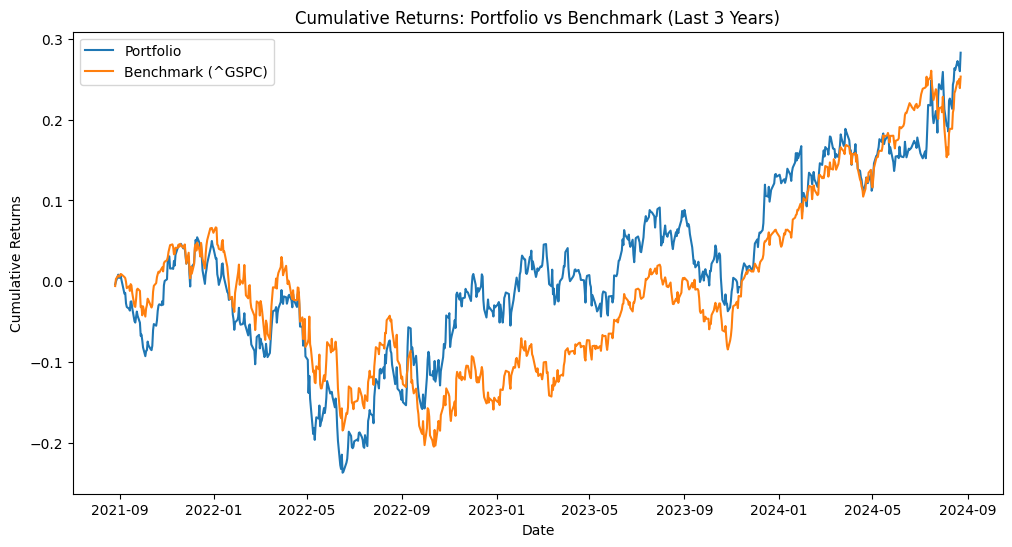

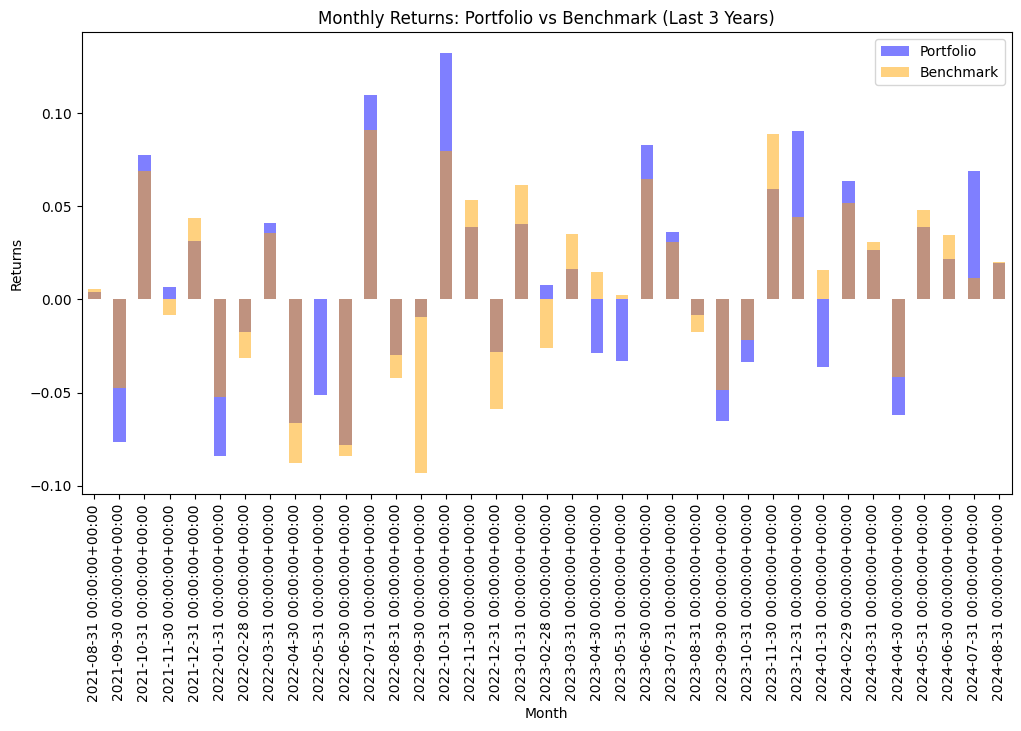

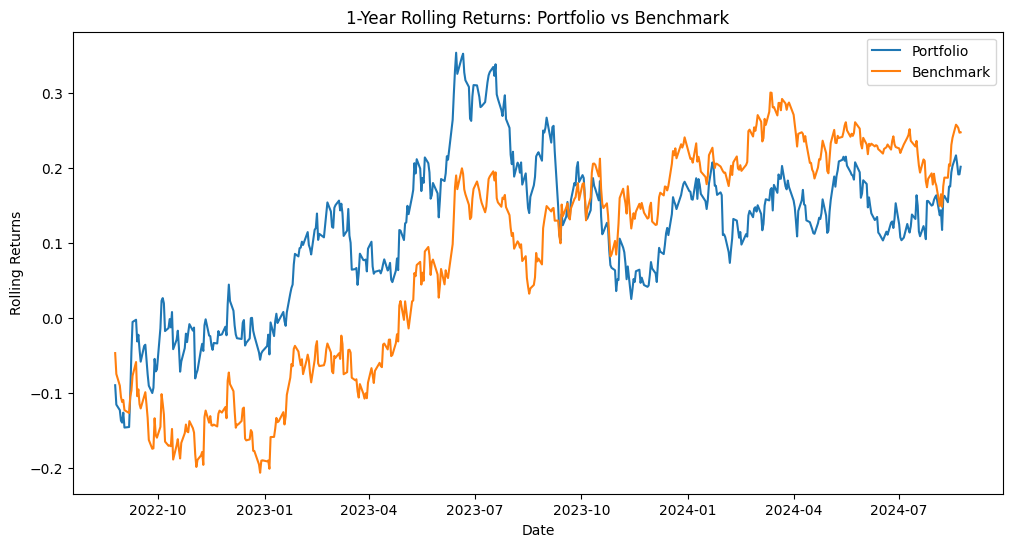

In [ ]:
stocks = ['REGN', 'RTX', 'RNG', 'ROK', 'RPM']
benchmark = '^GSPC'
data = yf.download(stocks + [benchmark], start="2021-08-25", end="2024-08-25")
prices = data['Adj Close']
def calc_portfolio_weights(prices,primary='REGN', primary_weight=0.3):
  latest_prices=prices.iloc[-1]
  remaining_prices=latest_prices[stocks].drop(primary)
  total_remaining=remaining_prices.sum()
  weights=(remaining_prices/total_remaining)*(1-primary_weight)
  weights[primary]=primary_weight
  return weights
portfolio_weights=calc_portfolio_weights(prices)
print(portfolio_weights)
daily_returns=prices.pct_change().dropna()
portfolio_weights = portfolio_weights.reindex(daily_returns[stocks].columns)
portfolio_returns = daily_returns[stocks].dot(portfolio_weights)
benchmark_returns = daily_returns[benchmark]
cov_matrix = np.cov(portfolio_returns, benchmark_returns)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
def calculate_sharpe_ratio(portfolio_returns,risk_free_rate=0.0436):
  excess_returns=portfolio_returns-risk_free_rate/252
  return np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
def calculate_treynor_ratio(portfolio_returns, benchmark_returns, beta, risk_free_rate=0.0436):
    excess_returns = portfolio_returns - risk_free_rate / 252
    return np.mean(excess_returns) / beta
def calculate_jensens_alpha(portfolio_returns, benchmark_returns, beta, risk_free_rate=0.0436):
  benchmark_excess = benchmark_returns - risk_free_rate / 252
  portfolio_excess = portfolio_returns - risk_free_rate / 252
  alpha = np.mean(portfolio_excess) - beta * np.mean(benchmark_excess)
  return alpha
sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)
treynor_ratio = calculate_treynor_ratio(portfolio_returns, benchmark_returns, beta)
jensens_alpha = calculate_jensens_alpha(portfolio_returns, benchmark_returns, beta)
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Treynor Ratio: {treynor_ratio}")
print(f"Jensen's Alpha: {jensens_alpha}")
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod() - 1
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label='Portfolio')
plt.plot(benchmark_cumulative_returns, label='Benchmark (^GSPC)')
plt.title('Cumulative Returns: Portfolio vs Benchmark (Last 3 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

print()
print()
print()
monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
portfolio_monthly_returns = monthly_returns[stocks].dot(portfolio_weights)
benchmark_monthly_returns = monthly_returns[benchmark]
plt.figure(figsize=(12, 6))
portfolio_monthly_returns.plot(kind='bar', color='blue', alpha=0.5, label='Portfolio')
benchmark_monthly_returns.plot(kind='bar', color='orange', alpha=0.5, label='Benchmark')
plt.title('Monthly Returns: Portfolio vs Benchmark (Last 3 Years)')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.legend()
plt.show()
print()
print()
print()
portfolio_rolling_returns = portfolio_returns.rolling(252).mean()*252
benchmark_rolling_returns = benchmark_returns.rolling(252).mean()*252


plt.figure(figsize=(12, 6))
plt.plot(portfolio_rolling_returns, label='Portfolio')
plt.plot(benchmark_rolling_returns, label='Benchmark')
plt.title('1-Year Rolling Returns: Portfolio vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Rolling Returns')
plt.legend()
plt.show()

There is a huge fall in both the portfolios Jan 2022 to June 2022. This is due to the effect of the Russian invasion of Ukraine which caused the stock market decline. This lasted from 2022-01 to 2022-06, however it took time for the S&P500 to recover from the bearish run, while the portfolio almost recovered instantly after that. S&P500 has been on a bullish run since 2023-06, since which it has surpassed the portfolio in cumulative returns and monthly returns aswell. The massive boost seen in 2024 is due to the major boost in share prices of BigTech companies. It then again observed a fall in 2024-08 , that is first week of August due to concern about the U.S economy.


In [ ]:
def annualized_volatility(returns):
    return np.std(returns) * np.sqrt(252)
def diversification_benefit(primary_returns, portfolio_returns):
    primary_volatility = annualized_volatility(primary_returns)
    portfolio_volatility = annualized_volatility(portfolio_returns)
    return primary_volatility - portfolio_volatility
primary_stock_returns = daily_returns['REGN']
def diversification_benefit(primary_returns, portfolio_returns):
    primary_volatility = annualized_volatility(primary_returns)
    portfolio_volatility = annualized_volatility(portfolio_returns)
    return primary_volatility - portfolio_volatility
def annualized_return(returns):
    compounded_growth = (1 + returns).prod()
    n = len(returns)
    return compounded_growth ** (252 / n) - 1
portfolio_sharpe_ratio=calculate_sharpe_ratio(portfolio_returns)
primary_sharpe_ratio=calculate_sharpe_ratio(primary_stock_returns)
print(f"Sharpe Ratio of Portfolio: {portfolio_sharpe_ratio}")
print(f"Sharpe Ratio of Primary Stock: {primary_sharpe_ratio}")
portfolio_annualized_return = annualized_return(portfolio_returns)
primary_annualized_return = annualized_return(primary_stock_returns)
diversification_benefits = diversification_benefit(primary_stock_returns, portfolio_returns)
print(f"Annualized Return of Portfolio: {portfolio_annualized_return}")
print(f"Annualized Return of Primary Stock: {primary_annualized_return}")
print(f"Diversification Benefit: {diversification_benefits}")
correlation_matrix = daily_returns[stocks].corr()
print(correlation_matrix)




Sharpe Ratio of Portfolio: 0.29760986841345655
Sharpe Ratio of Primary Stock: 0.6945760602498242
Annualized Return of Portfolio: 0.08689567976319412
Annualized Return of Primary Stock: 0.21555975500726188
Diversification Benefit: 0.0675947258519713
Ticker      REGN       RTX       RNG       ROK       RPM
Ticker                                                  
REGN    1.000000  0.155285  0.169492  0.231345  0.234041
RTX     0.155285  1.000000  0.192547  0.273088  0.289428
RNG     0.169492  0.192547  1.000000  0.361661  0.361857
ROK     0.231345  0.273088  0.361661  1.000000  0.473838
RPM     0.234041  0.289428  0.361857  0.473838  1.000000


There is lower volatility in the portfolio compared to the primary stock, which makes it less susceptible to market changes affect it too negatively.
There is mostly low correlation between any two stocks show low positive correlation, which makes it better for diversification, such that they will not move in the same direction, given one shows very bad returns. However the correlation between RPM and ROK, is relatively high which may prove bad for diversification since they tend to move together.


Correlation Weights:

Ticker
RTX     0.215325
RNG     0.197276
ROK     0.144532
RPM     0.142867
REGN    0.300000
Name: REGN, dtype: float64
Price Weights:

Ticker
REGN    0.300000
RTX     0.153745
RNG     0.043859
ROK     0.351518
RPM     0.150878
Name: 2024-08-23 00:00:00+00:00, dtype: float64
Price Weighted Portfolio:

Sharpe Ratio: 0.29760986841345655
Annualized Return: 0.08689567976319412
Diversification Benefit: 0.0675947258519713

Correlation Weighted Portfolio:

Sharpe Ratio: -0.01805905262531623
Annualized Return: 0.013451240556324962
Diversification Benefit: 0.04138605848420551




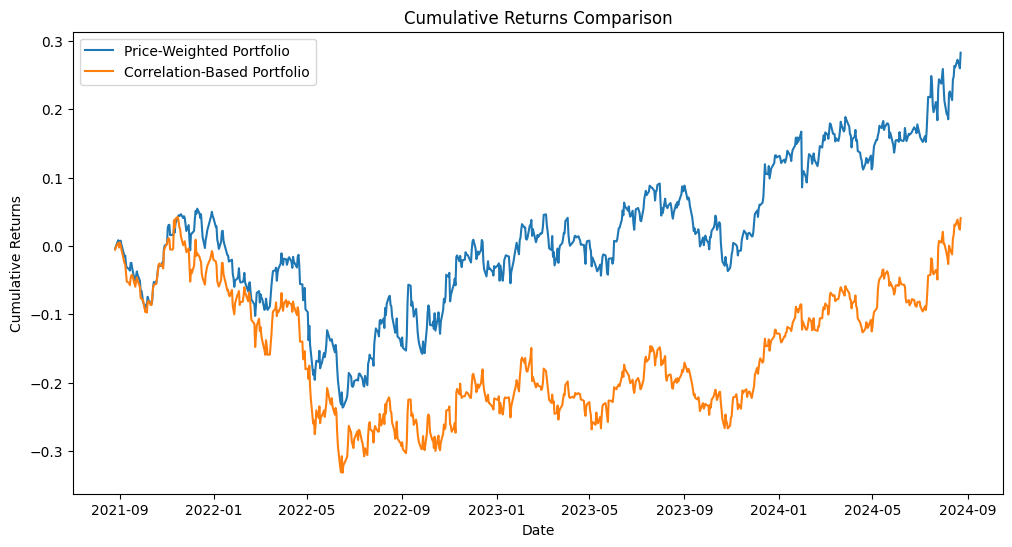

In [ ]:
def calc_correlation_weights(correlations, primary='REGN', primary_weight=0.3):
    correlation_with_primary = correlations.loc[primary].drop(primary)
    inverse_correlation = 1 / (correlation_with_primary)
    weights =(inverse_correlation / inverse_correlation.sum())*(1-primary_weight)
    weights[primary] = primary_weight
    return weights
correlation_weights = calc_correlation_weights(correlation_matrix)
print("Correlation Weights:\n")
print(correlation_weights)
print("Price Weights:\n")
print(portfolio_weights)
correlation_weights= correlation_weights.reindex(daily_returns[stocks].columns)
correlation_portfolio_returns = daily_returns[stocks].dot(correlation_weights)
correlation_sharpe_ratio = calculate_sharpe_ratio(correlation_portfolio_returns)
correlation_diversity_benefit=diversification_benefit(primary_stock_returns, correlation_portfolio_returns)
correlation_annualized_return=annualized_return(correlation_portfolio_returns)
correlation_weighted_cumulative = (1 + correlation_portfolio_returns).cumprod()-1
print("Price Weighted Portfolio:\n")
print(f"Sharpe Ratio: {portfolio_sharpe_ratio}")
print(f"Annualized Return: {portfolio_annualized_return}")
print(f"Diversification Benefit: {diversification_benefits}")
print()
print("Correlation Weighted Portfolio:\n")
print(f"Sharpe Ratio: {correlation_sharpe_ratio}")
print(f"Annualized Return: {correlation_annualized_return}")
print(f"Diversification Benefit: {correlation_diversity_benefit}")
print()
print()
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label='Price-Weighted Portfolio')
plt.plot(correlation_weighted_cumulative, label='Correlation-Based Portfolio')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

The price weighted portfolio comfortably beats the correlation weighted portfolio in the cumulative returns generated in the past three years. This maybe due to the fact that the higher priced stocks are performing better, which leads to increased returns. Moreover it can be observed that all the other 4 companies have a similar correlation with the primary stock, which leads to there not being any significant difference in the weights alloted to them.It is also heavily skewed due to increased weight alloted to RNG, which has seen a very huge drop in price from 2021-08 to 2024-08, that is from $250 to $34, which has significantly impacted the returns obtained.